In [48]:
#Import all
import pandas as pd
from string import punctuation
import re
import numpy as np

## Dataset

In [49]:
df = pd.read_csv('D:\D5k.csv', encoding='utf-8')

In [50]:
print(df.head())

   Sentiment                                             Review
0          1  লোগান এক্সমেন সিরিজের দশম কিস্তি এবং উলভারিনের...
1          1      গেম অব থ্রোন্স রিভিও বলবো না এটা জাস্ট ফিলিংস
2          1  এর প্রত্যেকটা মোমেন্ট| ডায়লগ| ক্যারাক্টার| সম্...
3          0  জোকারের ইতিহাস সৃষ্টি করা মুভি দ্য ডার্ক নাইট"...
4          1  যাই হোক বলবো আজ এক এমন ভালোবাসার গল্প যা আপনার...


In [51]:
print(df.tail())

      Sentiment                                             Review
4995          0  মুভিটিতে খানদের  ব্যাপারে ইচ্ছাকৃত নেগেটিভ রিভ...
4996          1  নিসন্দেহে DCEU এর এখন পর্যন্ত সেরা মুভি। আর বর...
4997          0  মুভিতে অনম বিশ্বাসের এই কাজটি আহামরি কিছু মনে ...
4998          0  মুভিতে সাফা কবিরকে ভাল না লাগার কারণে এর প্রতি...
4999          0                 এটি একটি দীর্ঘ সিরিজ। বোরিং লেগেছে


In [52]:
print(df.describe())

         Sentiment
count  5000.000000
mean      0.538200
std       0.498588
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


In [53]:
df.shape

(5000, 2)

## Data Visualization

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [55]:
df.isnull().sum()

Sentiment    0
Review       0
dtype: int64

Text(0.5, 1.0, 'Visualization of Missing Values')

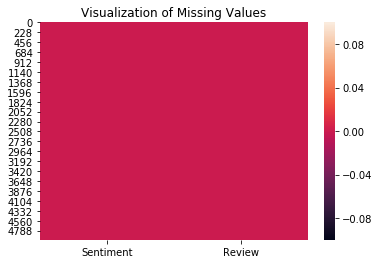

In [56]:
sns.heatmap(df.isnull())
plt.title('Visualization of Missing Values')

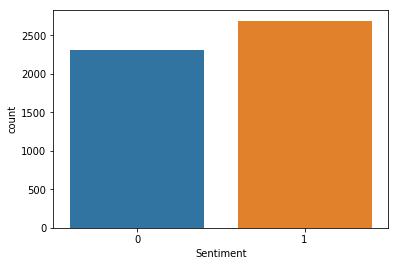

In [57]:
sns.countplot(x='Sentiment', data=df)

## Specify The Target Variable

In [58]:
target=df['Sentiment']

## Preprocessing

In [59]:
plain_text=df['Review'].tolist()

In [60]:
print(plain_text)

['লোগান এক্সমেন সিরিজের দশম কিস্তি এবং উলভারিনের উপর নির্মিত ৩য় ও শেষ চলচ্চিত্র তাছাড়াও সিরিজের অন্যতম সেরা মুভিও এটি কাহিনী অভিনয় সব দিক দিয়েই অসাধারণ।', 'গেম অব থ্রোন্স রিভিও বলবো না এটা জাস্ট ফিলিংস', 'এর প্রত্যেকটা মোমেন্ট| ডায়লগ| ক্যারাক্টার| সম্প্র্ক| সাম্রাজ্য|ভালোবাসা সব সব কিছুর এক কথায় প্রেমে পরে গেছি', 'জোকারের ইতিহাস সৃষ্টি করা মুভি দ্য ডার্ক নাইট" এর সিকোয়েন্স এটি। ক্রিস্টিফার নোলানের এই মুভিতে জোকার নেই কিন্তু আছে সমাজতান্তিক এক ভয়ানক ভিলেন বেন..!!"', 'যাই হোক বলবো আজ এক এমন ভালোবাসার গল্প যা আপনার চোখ থেকে মনের অজান্তেই পানি ফেলে দেবে। আমরা তো কতো ভালোবাসার গল্প জানি।', 'আসলে বলে আসলে শেষ করা যাবে না। ঝামেলা হল| এসব সিনকে ফুল প্রুফ করানোর জন্য অনেক যত্ন নেওয়া লাগে| অনেক বিশাল বাজেট লাগে। নাহলে অল্প বাজেটে যাই দেখাতে চাইবে| ব্যাপারটা হাস্যকর দেখায়।', 'ফিল্মটি যেহেতু সত্য ঘটনা নিয়ে সেহেতু পরিচালকের জন্য এটি ছিলো বেশ চ্যালেঞ্জিং কাজ।', 'প্রথমে ম্যালোরি আর তার বোনের কথোপকথন| হাসপাতালে যাওয়া| এই সময়টা প্রচণ্ড প্রচণ্ড বোরিং ও ক্রিঞ্জি ছিল।', 'কিন্তু পরিচালক সব উপেক্ষা করে আমাদ

## Punctuation and Special Character removal

In [61]:
processed_plain_text=[]

for i in range(len(plain_text)):
    p=[plain_text[i]
    .replace(","," ").replace(";","").replace("।"," ").replace("?","").replace("!","").replace(":","").replace("—"," ")
    .replace(":-","").replace("-"," ").replace("’","").replace("'","").replace("“","").replace("”","").replace("(","")
    .replace(")","").replace("{","").replace("}","").replace("[","").replace("]","").replace("√","").replace("<","")
    .replace(">","").replace("=","").replace("...","").replace(".","").replace("*","").replace("|","").replace("/","")
    .replace("$","").replace("@","").replace("+","").replace("0","").replace("1","").replace("2","").replace("3","")
    .replace("4","").replace("5","").replace("6","").replace("7","").replace("8","").replace("9","").replace("A","")
    .replace("B","").replace("C","").replace("D","").replace("E","").replace("F","").replace("G","").replace("H","")
    .replace("I","").replace("J","").replace("K","").replace("L","").replace("M","").replace("N","").replace("O","")
    .replace("P","").replace("Q","").replace("R","").replace("S","").replace("T","").replace("U","").replace("V","")
    .replace("W","").replace("X","").replace("Y","").replace("Z","").replace("০","").replace("১","").replace("২","")
    .replace("৩","").replace("৪","").replace("৫","").replace("৬","").replace("৭","").replace("৮","").replace("৯","")
    .replace("a","").replace("b","").replace("c","").replace("d","").replace("e","").replace("f","").replace("g","")
    .replace("h","").replace("i","").replace("j","").replace("k","").replace("l","").replace("m","").replace("n","")
    .replace("o","").replace("p","").replace("q","").replace("r","").replace("s","").replace("t","").replace("u","")
    .replace("v","").replace("w","").replace("x","").replace("y","").replace("z","").replace(" "," ")]
    processed_plain_text.append(p)
print(processed_plain_text)

[['লোগান এক্সমেন সিরিজের দশম কিস্তি এবং উলভারিনের উপর নির্মিত য় ও শেষ চলচ্চিত্র তাছাড়াও সিরিজের অন্যতম সেরা মুভিও এটি কাহিনী অভিনয় সব দিক দিয়েই অসাধারণ '], ['গেম অব থ্রোন্স রিভিও বলবো না এটা জাস্ট ফিলিংস'], ['এর প্রত্যেকটা মোমেন্ট ডায়লগ ক্যারাক্টার সম্প্র্ক সাম্রাজ্যভালোবাসা সব সব কিছুর এক কথায় প্রেমে পরে গেছি'], ['জোকারের ইতিহাস সৃষ্টি করা মুভি দ্য ডার্ক নাইট" এর সিকোয়েন্স এটি  ক্রিস্টিফার নোলানের এই মুভিতে জোকার নেই কিন্তু আছে সমাজতান্তিক এক ভয়ানক ভিলেন বেন"'], ['যাই হোক বলবো আজ এক এমন ভালোবাসার গল্প যা আপনার চোখ থেকে মনের অজান্তেই পানি ফেলে দেবে  আমরা তো কতো ভালোবাসার গল্প জানি '], ['আসলে বলে আসলে শেষ করা যাবে না  ঝামেলা হল এসব সিনকে ফুল প্রুফ করানোর জন্য অনেক যত্ন নেওয়া লাগে অনেক বিশাল বাজেট লাগে  নাহলে অল্প বাজেটে যাই দেখাতে চাইবে ব্যাপারটা হাস্যকর দেখায় '], ['ফিল্মটি যেহেতু সত্য ঘটনা নিয়ে সেহেতু পরিচালকের জন্য এটি ছিলো বেশ চ্যালেঞ্জিং কাজ '], ['প্রথমে ম্যালোরি আর তার বোনের কথোপকথন হাসপাতালে যাওয়া এই সময়টা প্রচণ্ড প্রচণ্ড বোরিং ও ক্রিঞ্জি ছিল '], ['কিন্তু পরিচালক সব উপেক্ষা করে আম

## Tokenization

In [62]:
tokenization_result=[]
for j in processed_plain_text:
    t=j[0].split(" ")
    tokenization_result.append(t)
print(tokenization_result)

[['লোগান', 'এক্সমেন', 'সিরিজের', 'দশম', 'কিস্তি', 'এবং', 'উলভারিনের', 'উপর', 'নির্মিত', 'য়', 'ও', 'শেষ', 'চলচ্চিত্র', 'তাছাড়াও', 'সিরিজের', 'অন্যতম', 'সেরা', 'মুভিও', 'এটি', 'কাহিনী', 'অভিনয়', 'সব', 'দিক', 'দিয়েই', 'অসাধারণ', ''], ['গেম', 'অব', 'থ্রোন্স', 'রিভিও', 'বলবো', 'না', 'এটা', 'জাস্ট', 'ফিলিংস'], ['এর', 'প্রত্যেকটা', 'মোমেন্ট', 'ডায়লগ', 'ক্যারাক্টার', 'সম্প্র্ক', 'সাম্রাজ্যভালোবাসা', 'সব', 'সব', 'কিছুর', 'এক', 'কথায়', 'প্রেমে', 'পরে', 'গেছি'], ['জোকারের', 'ইতিহাস', 'সৃষ্টি', 'করা', 'মুভি', 'দ্য', 'ডার্ক', 'নাইট"', 'এর', 'সিকোয়েন্স', 'এটি', '', 'ক্রিস্টিফার', 'নোলানের', 'এই', 'মুভিতে', 'জোকার', 'নেই', 'কিন্তু', 'আছে', 'সমাজতান্তিক', 'এক', 'ভয়ানক', 'ভিলেন', 'বেন"'], ['যাই', 'হোক', 'বলবো', 'আজ', 'এক', 'এমন', 'ভালোবাসার', 'গল্প', 'যা', 'আপনার', 'চোখ', 'থেকে', 'মনের', 'অজান্তেই', 'পানি', 'ফেলে', 'দেবে', '', 'আমরা', 'তো', 'কতো', 'ভালোবাসার', 'গল্প', 'জানি', ''], ['আসলে', 'বলে', 'আসলে', 'শেষ', 'করা', 'যাবে', 'না', '', 'ঝামেলা', 'হল', 'এসব', 'সিনকে', 'ফুল', 'প্রুফ', 'করানোর', 'জন্য', '

## Stopword Removal

In [63]:
#Bengali_Stopwords
li=['অতএব','অথচ','অথবা','অনুযায়ী','অনেক', 'ও', 'অনেকে', 'অনেকেই', 'অন্তত','অন্য', 'অবধি', 'অবশ্য','অর্থাত','আই','আগামী','আগে','আগেই','আছে','আজ','আদ্যভাগে','আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার','আমি','আর','আরও','ই','ইত্যাদি', 'ইহা', 
    'উচিত','উত্তর','উনি','উপর','উপরে','এ','এঁদের','এঁরা','এই','একই','একটি','একবার','একে','এক্','এখন','এখনও','এখানে','এখানেই','এটা','এটাই','এটি','এত','এতটাই','এতে','এদের','এব','এবং','এবার','এমন','এমনকী','এমনি','এর','এরা','এল','এস','এসে','ঐ','ও','ওঁদের','ওঁর',
    'ওঁরা','ওই','ওকে','ওখানে','ওদের','ওর','ওরা','কখনও','কত','কবে','কমনে','কয়েক','কয়েকটি','করছে','করছেন','করতে','করবে','করবেন',
    'করলে','করলেন','করা','করাই','করায়','করার','করি','করিতে','করিয়া','করিয়ে','করে','করেই','করেছিলেন','করেছে','করেছেন','করেন','কাউকে',
    'কাছ','কাছে','কাজ','কাজে','কারও','কারণ','কি','কিংবা','কিছু','কিছুই','কিন্তু','কী','কে','কেউ','কেউই','কেখা','কেন','কোটি','কোন','কোনও','কোনো','ক্ষেত্রে','কয়েক','খুব','গিয়ে','গিয়েছে','গিয়ে','গুলি','গেছে','গেল','গেলে',
    'গোটা','চলে','চান', 'চায়','চার','চালু','চেয়ে','চেষ্টা','ছাড়া','ছাড়াও','ছিল','ছিলেন','জন','জনকে','জনের','জন্য','জন্যওজে','জানতে','জানা',
    'জানানো','জানায়','জানিয়ে','জানিয়েছে','জে','জ্নজন','টি','ঠিক','তখন','তত','তথা','তবু','তবে','তা','তাঁকে','তাঁদের','তাঁর','তাঁরা','তাঁাহারা',
    'তাই','তাও','তাকে','তাতে','তাদের','তার','তারপর','তারা','তারৈ','তাহলে','তাহা','তাহাতে','তাহার','তিনঐ','তিনি','তিনিও','তুমি','তুলে','তেমন',
    'তো','তোমার','থাকবে','থাকবেন','থাকা','থাকায়','থাকে','থাকেন','থেকে','থেকেই','থেকেও','দিকে','দিন','দিতে','দিয়ে','দিয়েছে','দিয়েছেন','দিলেন',
    'দু','দুই','দুটি','দুটো','দেওয়া','দেওয়ার','দেওয়া','দেখতে','দেখা','দেখে','দেন','দেয়','দ্বারা','ধরা','ধরে','ধামার','নতুন','নয়','না','নাই',
    'নাকি','নাগাদ','নানা','নিজে','নিজেই','নিজেদের','নিজের','নিতে','নিয়ে','নেই','নেওয়া','নেওয়ার','নয়','পক্ষে','পর','পরে','পরেই','পরেও',
    'পর্যন্ত','পাওয়া','পাচ','পারি','পারে','পারেন','পি','পেয়ে','প্রতি','প্রথম','প্রভৃতি','প্রাথমিক','প্রায়','ফলে','ফিরে','ফের','বক্তব্য','বদলে','বন',
    'বরং','বলতে','বলল','বললেন','বলা','বলে','বলেছেন','বলেন','বসে','বহু','বা','বাদে','বার','বি','বিনা','বিভিন্ন','বিশেষ','বিষয়টি','বেশ',
    'বেশি','ব্যবহার','ব্যাপারে','ভাবে','ভাবেই','মতো','মতোই','মধ্যভাগে','মধ্যে','মধ্যেই','মধ্যেও','মনে','মাত্র','মাধ্যমে','মোট','মোটেই','যখন',
    'যত','যতটা','যথেষ্ট','যদি','যদিও','যা','যাঁর','যাঁরা','যাওয়া','যাওয়ার','যাওয়া','যাকে','যাচ্ছে','যাতে','যাদের','যান','যাবে','যায়','যার',
    'যারা','যিনি','যে','যেখানে','যেতে','যেন','যেমন','র','রকম','রয়েছে','রাখা','রেখে','লক্ষ','শুধু','শুরু','সঙ্গে','সঙ্গেও','সব','সবার',
    'সমস্ত','সম্প্রতি','সহ','সহিত','সাধারণ','সামনে','সি','সুতরাং','সে','সেই','সেখান','সেখানে','সেটা','সেটাই','সেটাও','সেটি','স্পষ্ট','স্বয়ং',
    'হইতে','হইবে','হইয়া','হওয়া','হওয়ায়','হওয়ার','হচ্ছে','হত','হতে','হতেই','হন','হবে','হবেন','হয়','হয়তো','হয়নি','হয়ে','হয়েই','হয়েছিল',
    'হয়েছে','হয়েছেন','হল','হলে','হলেই','হলেও','হলো','হাজার','হিসাবে','হৈলে','হোক','হয়','টা','তে','য়','ক','খ','গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন','প',
     'ফ','ব','ভ','ম','য','র','ল','শ','স','হ','অ','আ','ঈ','ঋ','এ','ঔ','এক','বেন','অব','থ্রোন্স']

In [64]:
r =[]
stop_words_removal_result = [[] for i in range(len(tokenization_result))]
for i in range(len(tokenization_result)):
    for j in range(len(tokenization_result[i])):
        if tokenization_result[i][j] not in li:
            r.append(tokenization_result[i][j])
            stop_words_removal_result[i].append(tokenization_result[i][j])
print(stop_words_removal_result)

[['লোগান', 'এক্সমেন', 'সিরিজের', 'দশম', 'কিস্তি', 'উলভারিনের', 'নির্মিত', 'শেষ', 'চলচ্চিত্র', 'তাছাড়াও', 'সিরিজের', 'অন্যতম', 'সেরা', 'মুভিও', 'কাহিনী', 'অভিনয়', 'দিক', 'দিয়েই', 'অসাধারণ', ''], ['গেম', 'রিভিও', 'বলবো', 'জাস্ট', 'ফিলিংস'], ['প্রত্যেকটা', 'মোমেন্ট', 'ডায়লগ', 'ক্যারাক্টার', 'সম্প্র্ক', 'সাম্রাজ্যভালোবাসা', 'কিছুর', 'কথায়', 'প্রেমে', 'গেছি'], ['জোকারের', 'ইতিহাস', 'সৃষ্টি', 'মুভি', 'দ্য', 'ডার্ক', 'নাইট"', 'সিকোয়েন্স', '', 'ক্রিস্টিফার', 'নোলানের', 'মুভিতে', 'জোকার', 'সমাজতান্তিক', 'ভয়ানক', 'ভিলেন', 'বেন"'], ['যাই', 'বলবো', 'ভালোবাসার', 'গল্প', 'চোখ', 'মনের', 'অজান্তেই', 'পানি', 'ফেলে', 'দেবে', '', 'কতো', 'ভালোবাসার', 'গল্প', 'জানি', ''], ['আসলে', 'আসলে', 'শেষ', '', 'ঝামেলা', 'এসব', 'সিনকে', 'ফুল', 'প্রুফ', 'করানোর', 'যত্ন', 'নেওয়া', 'লাগে', 'বিশাল', 'বাজেট', 'লাগে', '', 'নাহলে', 'অল্প', 'বাজেটে', 'যাই', 'দেখাতে', 'চাইবে', 'ব্যাপারটা', 'হাস্যকর', 'দেখায়', ''], ['ফিল্মটি', 'যেহেতু', 'সত্য', 'ঘটনা', 'নিয়ে', 'সেহেতু', 'পরিচালকের', 'ছিলো', 'চ্যালেঞ্জিং', ''], ['প্রথমে', 'ম্যাল

## Term Frequency (TF)

In [65]:
from collections import Counter
cnt = Counter(r)
TF = {}
for processed_plain_text in stop_words_removal_result:
    for word in processed_plain_text:
        TF[word] = round(cnt[word]/len(processed_plain_text),2)
#print(counts)
print(TF)

{'লোগান': 0.07, 'এক্সমেন': 0.3, 'সিরিজের': 4.07, 'দশম': 0.05, 'কিস্তি': 0.22, 'উলভারিনের': 0.05, 'নির্মিত': 1.65, 'শেষ': 19.27, 'চলচ্চিত্র': 8.67, 'তাছাড়াও': 0.05, 'অন্যতম': 3.4, 'সেরা': 10.0, 'মুভিও': 2.0, 'কাহিনী': 6.0, 'অভিনয়': 17.5, 'দিক': 5.62, 'দিয়েই': 0.94, 'অসাধারণ': 12.05, '': 1987.2, 'গেম': 2.36, 'রিভিও': 0.19, 'বলবো': 3.1, 'জাস্ট': 1.04, 'ফিলিংস': 0.18, 'প্রত্যেকটা': 0.78, 'মোমেন্ট': 0.5, 'ডায়লগ': 7.0, 'ক্যারাক্টার': 0.11, 'সম্প্র্ক': 0.1, 'সাম্রাজ্যভালোবাসা': 0.1, 'কিছুর': 0.83, 'কথায়': 2.28, 'প্রেমে': 0.8, 'গেছি': 1.2, 'জোকারের': 0.06, 'ইতিহাস': 0.21, 'সৃষ্টি': 1.35, 'মুভি': 97.0, 'দ্য': 5.6, 'ডার্ক': 0.91, 'নাইট"': 0.03, 'সিকোয়েন্স': 0.29, 'ক্রিস্টিফার': 0.06, 'নোলানের': 0.18, 'মুভিতে': 22.18, 'জোকার': 1.17, 'সমাজতান্তিক': 0.06, 'ভয়ানক': 0.2, 'ভিলেন': 1.85, 'বেন"': 0.06, 'যাই': 3.56, 'ভালোবাসার': 0.41, 'গল্প': 10.44, 'চোখ': 1.39, 'মনের': 1.4, 'অজান্তেই': 0.06, 'পানি': 2.3, 'ফেলে': 0.73, 'দেবে': 0.64, 'কতো': 0.16, 'জানি': 4.08, 'আসলে': 4.31, 'ঝামেলা': 0.29, 'এসব': 1.58, 'স

## Inverse Document Frequency (IDF)

In [66]:
n = len(stop_words_removal_result) 
#print(n)
terms = list(TF.keys())
import math
IDF = {}
for term in terms:
    c = 0
    for doc in stop_words_removal_result:
        if term in doc:
            c+=1
    IDF[term] = math.log(n/(c+1))
print(IDF)


{'লোগান': 7.418580902748128, 'এক্সমেন': 7.1308988302963465, 'সিরিজের': 4.585367558691912, 'দশম': 7.824046010856292, 'কিস্তি': 7.418580902748128, 'উলভারিনের': 7.824046010856292, 'নির্মিত': 4.853631545286591, 'শেষ': 3.280751228586288, 'চলচ্চিত্র': 4.240527072400182, 'তাছাড়াও': 7.824046010856292, 'অন্যতম': 4.605170185988092, 'সেরা': 3.713172146682981, 'মুভিও': 5.809142990314028, 'কাহিনী': 3.7465085669505727, 'অভিনয়': 2.8234610526135375, 'দিক': 4.688551794927142, 'দিয়েই': 5.683979847360021, 'অসাধারণ': 3.101092789211817, '': 0.26605105232548626, 'গেম': 5.339139361068292, 'রিভিও': 6.907755278982137, 'বলবো': 4.546901277864116, 'জাস্ট': 5.149897361429764, 'ফিলিংস': 7.418580902748128, 'প্রত্যেকটা': 6.437751649736401, 'মোমেন্ট': 6.214608098422191, 'ডায়লগ': 4.990832666800076, 'ক্যারাক্টার': 7.418580902748128, 'সম্প্র্ক': 7.824046010856292, 'সাম্রাজ্যভালোবাসা': 7.824046010856292, 'কিছুর': 5.521460917862246, 'কথায়': 4.779523573132869, 'প্রেমে': 5.683979847360021, 'গেছি': 6.571283042360924, 'জোকারের

In [67]:
#Calculate tfIdf
tfIdf = [[] for i in range(len(stop_words_removal_result))]
for i in range(len(stop_words_removal_result)):
    for word in terms:
        if word in stop_words_removal_result[i]:
            tfIdf[i].append(TF[word]*IDF[word])
        else:
            tfIdf[i].append(0)
print(tfIdf[10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 528.6966511812063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.3519278464446443, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.381748626028751, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19.67924222791803, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10.236577181497356, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17.454494587902218, 0, 0, 3.98800336874965, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12.8750016677805, 14.296256219602538, 0.15648092021712584, 0.15648092021712584, 7.142692600745641, 1.7085335910138402, 0.15648092021712584, 5.112045831476345, 2.8246821633190367, 0.9644155173572567, 65.70683746889479, 0.6676722812473315, 1.0361632918473205, 0.8902297083297753, 0.7418580902748129, 9.062263064889883, 1.6141040933251638, 33.9388161151774, 21.887063786076496, 14.354422989180721, 6.108986900731932, 22.78983309984327, 0.15648092021712584, 0.156480

## Splitting the Dataset

In [78]:
#Train Data

train_x= tfIdf[:3800]
train_y= target[:3800]

#Test Data
test_x=tfIdf[3800:]
test_y=target[3800:]

## Model-1: Decision Tree 

In [79]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [80]:
DT=tree.DecisionTreeClassifier()
DT.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
predictions_train = DT.predict(train_x)

train_DT=accuracy_score(train_y, predictions_train)
print('\nTraining Accuracy using DT:',train_DT)
print('\n\t')
print('Classification Report On Training Data:\n')
print(classification_report(train_y,predictions_train)) 


Training Accuracy using DT: 0.9997368421052631

	
Classification Report On Training Data:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1812
           1       1.00      1.00      1.00      1988

   micro avg       1.00      1.00      1.00      3800
   macro avg       1.00      1.00      1.00      3800
weighted avg       1.00      1.00      1.00      3800



In [82]:
predictions_test = DT.predict(test_x)

test_DT=accuracy_score(test_y, predictions_test)
print('\nTest Accuracy using DT:',test_DT)
 
print('\nConfusion matrix:\n',confusion_matrix(test_y,predictions_test))
print('\n\tClassification Report On Testing Data:\n')
print(classification_report(test_y,predictions_test)) 


Test Accuracy using DT: 0.9275

Confusion matrix:
 [[454  43]
 [ 44 659]]

	Classification Report On Testing Data:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       497
           1       0.94      0.94      0.94       703

   micro avg       0.93      0.93      0.93      1200
   macro avg       0.93      0.93      0.93      1200
weighted avg       0.93      0.93      0.93      1200



## Model-2 Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [84]:
RF = RandomForestClassifier(n_estimators=100, random_state=0) 
RF.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [85]:
pred_train = RF.predict(train_x)
train_RF=accuracy_score(train_y, pred_train)
print('\nTraining Accuracy using RF:',train_RF)
print('\n\tClassification Report on Training Data:\n\n')
print(classification_report(train_y,pred_train)) 




Training Accuracy using RF: 0.9997368421052631

	Classification Report on Training Data:


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1812
           1       1.00      1.00      1.00      1988

   micro avg       1.00      1.00      1.00      3800
   macro avg       1.00      1.00      1.00      3800
weighted avg       1.00      1.00      1.00      3800



In [86]:
pred_test = RF.predict(test_x)
test_RF=accuracy_score(test_y, pred_test)
print('\nTest Accuracy using RF:',test_RF)
 


print('\nConfusion matrix:\n\n',confusion_matrix(test_y,pred_test))
print('\n\tClassification Report on Testing Data:\n')
print(classification_report(test_y,pred_test))  



Test Accuracy using RF: 0.9391666666666667

Confusion matrix:

 [[470  27]
 [ 46 657]]

	Classification Report on Testing Data:

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       497
           1       0.96      0.93      0.95       703

   micro avg       0.94      0.94      0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



## Model-3 Naive Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [88]:
NB=GaussianNB()
NB.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
pred_train = NB.predict(train_x)
train_NB=accuracy_score(train_y, pred_train)
print('\nTraining Accuracy using NB:',train_NB)
print('\n\tClassification Report on Training Data:\n\n')
print(classification_report(train_y,pred_train)) 


Training Accuracy using NB: 0.9460526315789474

	Classification Report on Training Data:


              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1812
           1       1.00      0.90      0.95      1988

   micro avg       0.95      0.95      0.95      3800
   macro avg       0.95      0.95      0.95      3800
weighted avg       0.95      0.95      0.95      3800



In [90]:
pred_test = NB.predict(test_x)
test_NB=accuracy_score(test_y, pred_test)
print('\nTest Accuracy using NB:',test_NB)
 


print('\nConfusion matrix:\n\n',confusion_matrix(test_y,pred_test))
print('\n\tClassification Report on Testing Data:\n')
print(classification_report(test_y,pred_test))  



Test Accuracy using NB: 0.8591666666666666

Confusion matrix:

 [[467  30]
 [139 564]]

	Classification Report on Testing Data:

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       497
           1       0.95      0.80      0.87       703

   micro avg       0.86      0.86      0.86      1200
   macro avg       0.86      0.87      0.86      1200
weighted avg       0.88      0.86      0.86      1200



## Model-4 GBM

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

GBM = GradientBoostingClassifier(n_estimators=3500, max_features=2, max_depth=9, random_state=0)
GBM.fit(train_x,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3500,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [101]:
pred_train = GBM.predict(train_x)
train_GBM=accuracy_score(train_y, pred_train)
print('\nTraining Accuracy using NB:',train_GBM)
print('\n\tClassification Report on Training Data:\n\n')
print(classification_report(train_y,pred_train)) 


Training Accuracy using NB: 0.9905263157894737

	Classification Report on Training Data:


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1812
           1       1.00      0.99      0.99      1988

   micro avg       0.99      0.99      0.99      3800
   macro avg       0.99      0.99      0.99      3800
weighted avg       0.99      0.99      0.99      3800



In [102]:
pred_test = GBM.predict(test_x)
test_GBM=accuracy_score(test_y, pred_test)
print('\nTest Accuracy using GBM:',test_GBM)
print('\nConfusion matrix:\n\n',confusion_matrix(test_y,pred_test))
print('\n\tClassification Report on Testing Data:\n')
print(classification_report(test_y,pred_test)) 


Test Accuracy using GBM: 0.935

Confusion matrix:

 [[472  25]
 [ 53 650]]

	Classification Report on Testing Data:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       497
           1       0.96      0.92      0.94       703

   micro avg       0.94      0.94      0.94      1200
   macro avg       0.93      0.94      0.93      1200
weighted avg       0.94      0.94      0.94      1200



## ANN

In [94]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense

In [98]:
ANN=Sequential()

ANN.add(Dense(output_dim=20, init='uniform', activation='relu',input_dim=13042))
ANN.add(Dense(output_dim=20, init='uniform', activation='relu'))
ANN.add(Dense(output_dim=1,init='uniform', activation='sigmoid'))
ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ANN.summary()

r = np.array(train_x)
s = np.array(train_y)

train_history=ANN.fit(r,s,batch_size=300,epochs=150)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13042, units=20, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 20)                260860    
_________________________________________________________________
dense_14 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 261,301
Trainable params: 261,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
3800/3800 [==============================] - 1s 225us/step - loss: 0.6904 - accuracy: 0.5229
Epoch 2/150
3800/3800 [==============================] - 1s 191us/step - loss: 0.6766 - accuracy: 0.5895
Epoch 3/150
3800/3800 [==============================] - 1s 186us/step - loss: 0.6608 - accuracy: 0.6158
Epoch 4/150
3800/3800 [==============================] - 1s 185

3800/3800 [==============================] - 1s 188us/step - loss: 0.0019 - accuracy: 0.9995
Epoch 71/150
3800/3800 [==============================] - 1s 183us/step - loss: 0.0017 - accuracy: 0.9997
Epoch 72/150
3800/3800 [==============================] - 1s 178us/step - loss: 0.0015 - accuracy: 0.9997
Epoch 73/150
3800/3800 [==============================] - 1s 182us/step - loss: 0.0014 - accuracy: 0.9995
Epoch 74/150
3800/3800 [==============================] - 1s 179us/step - loss: 0.0015 - accuracy: 0.9997
Epoch 75/150
3800/3800 [==============================] - 1s 184us/step - loss: 0.0016 - accuracy: 0.9995
Epoch 76/150
3800/3800 [==============================] - 1s 182us/step - loss: 0.0016 - accuracy: 0.9995
Epoch 77/150
3800/3800 [==============================] - 1s 183us/step - loss: 0.0014 - accuracy: 0.9997
Epoch 78/150
3800/3800 [==============================] - 1s 181us/step - loss: 0.0017 - accuracy: 0.9995
Epoch 79/150
3800/3800 [==============================] - 1

3800/3800 [==============================] - 1s 268us/step - loss: 8.7826e-04 - accuracy: 0.9997
Epoch 146/150
3800/3800 [==============================] - 1s 288us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 147/150
3800/3800 [==============================] - 1s 286us/step - loss: 0.0016 - accuracy: 0.9997
Epoch 148/150
3800/3800 [==============================] - 1s 283us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 149/150
3800/3800 [==============================] - 1s 280us/step - loss: 0.0011 - accuracy: 0.9997
Epoch 150/150
3800/3800 [==============================] - 1s 285us/step - loss: 0.0024 - accuracy: 0.9995


In [99]:
r_test=np.array(test_x)
s_test= np.array(test_y)
ANN.evaluate(r_test,s_test)[1] 

1200/1200 [==============================] - 0s 316us/step


0.9433333277702332

In [44]:
history = ANN.fit(r, s,validation_data = (r_test,s_test), epochs=10, batch_size=240)

Train on 3980 samples, validate on 710 samples
Epoch 1/10
3980/3980 [==============================] - 1s 218us/step - loss: 8.6702e-04 - accuracy: 0.9997 - val_loss: 0.4717 - val_accuracy: 0.9282
Epoch 2/10
3980/3980 [==============================] - 1s 213us/step - loss: 7.6933e-04 - accuracy: 0.9997 - val_loss: 0.4855 - val_accuracy: 0.9239
Epoch 3/10
3980/3980 [==============================] - 1s 206us/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.4570 - val_accuracy: 0.9282
Epoch 4/10
3980/3980 [==============================] - 1s 201us/step - loss: 8.5660e-04 - accuracy: 0.9997 - val_loss: 0.4618 - val_accuracy: 0.9296
Epoch 5/10
3980/3980 [==============================] - 1s 209us/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.4897 - val_accuracy: 0.9239
Epoch 6/10
3980/3980 [==============================] - 1s 208us/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.4620 - val_accuracy: 0.9296
Epoch 7/10
3980/3980 [==============================] - 1s 211us/

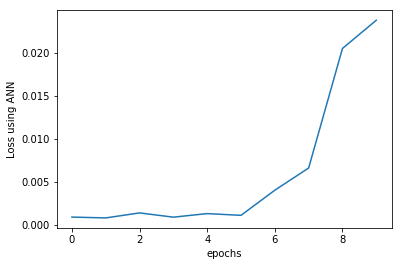

In [47]:
plt.xlabel('epochs')
plt.ylabel('Loss using ANN')
plt.plot(loss)
plt.show()

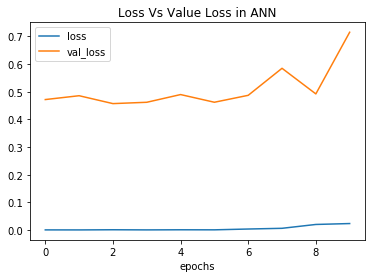

In [46]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.title('Loss Vs Value Loss in ANN')
plt.xlabel('epochs')
plt.ylabel('')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.show()